This is a file for the splitting of data.

In [1]:
from sklearn import model_selection
import numpy as np
import pandas as pd


from hn.load_data import load_data
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)}')
Y = data['label']
del data['label']

sss = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
cv_4fold = model_selection.StratifiedKFold(n_splits=4)

count = 0 
for train_index, test_index in sss.split(data, Y):
    train_scores = []
    test_scores = []
    count += 1
    print(f'Iteration {count}')
    data_array = pd.DataFrame.from_dict(data) #Needed to be able to index this later 
    split_X_train = data_array.iloc[train_index]
    split_y_train = Y[train_index]
    split_X_test = data_array.iloc[test_index]
    split_y_test = Y[test_index]
    print(f'Training dataset size {len(split_X_train)}')
    print(f'Test dataset size {len(split_X_test)}')

    # Loop over the folds
    for training_index, validation_index in cv_4fold.split(split_X_train, split_y_train):
        X_validation = split_X_train.iloc[validation_index]
        y_validation = split_y_train[validation_index]
        X_train = split_X_train.iloc[training_index]
        y_train = split_y_train[training_index]
        print(f'Validation size in current fold = {len(X_validation)}')


The number of samples: 113
The number of features: 160
Iteration 1
Training dataset size 90
Test dataset size 23
Validation size in current fold = 23
Validation size in current fold = 23
Validation size in current fold = 22
Validation size in current fold = 22
Iteration 2
Training dataset size 90
Test dataset size 23
Validation size in current fold = 23
Validation size in current fold = 23
Validation size in current fold = 22
Validation size in current fold = 22
Iteration 3
Training dataset size 90
Test dataset size 23
Validation size in current fold = 23
Validation size in current fold = 23
Validation size in current fold = 22
Validation size in current fold = 22
Iteration 4
Training dataset size 90
Test dataset size 23
Validation size in current fold = 23
Validation size in current fold = 23
Validation size in current fold = 22
Validation size in current fold = 22
Iteration 5
Training dataset size 90
Test dataset size 23
Validation size in current fold = 23
Validation size in current

In [3]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.impute import KNNImputer

# Data preprocessing
# Input data is X_train en y_train

In [ ]:
# 1. Scaling (standard, min max, robust)

# Scale the data to be normal
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

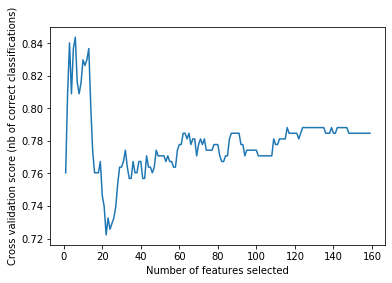

Optimal number of features : 6


In [5]:
# 2. Feature selection/extraction
# Create the Recursive Feature Elimination object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")

# classifications
rfecv = feature_selection.RFECV(
    estimator=svc, step=1, 
    cv=model_selection.StratifiedKFold(4),
    scoring='roc_auc')
rfecv.fit(X_train_scaled, y_train)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print("Optimal number of features : %d" % rfecv.n_features_)